Aplicando o algoritmo Naive Bayes na base de dados do projeto.

In [ ]:
# bibliotecas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# Importando a base de dados do projeto 
from google.colab import files
uploaded = files.upload()
td = pd.read_csv ('census.csv') 

Saving census.csv to census.csv


In [ ]:
# verificando as primeiras instâncias
td.head()

,Unnamed: 0,age,workclass,final.weight,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loos,hour.per.week,native.country,income
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# identificar o tipo de cada variável
td.dtypes

Unnamed: 0         int64
age                int64
workclass         object
final.weight       int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loos       int64
hour.per.week      int64
native.country    object
income            object
dtype: object

In [ ]:
# Removendo os dados inválidos do dataset
td = td[(td.astype(str) != ' ?').all(axis=1)]
len(td)

30162

In [ ]:
# Criando um método para categorizar a idade de acordo com a sua respectiva faixa etária
def age_category(idade):
  if idade <= 19:
    return 0 # Jovem
  elif idade >= 20 and idade <= 59:
    return 1 # Adulto
  else:
    return 2 # Idoso

# Cria a coluna 'age_category' a partir dos dados da coluna 'age' e aplica o método 'age_category' linha por linha, através da função 'map'
td['age_category'] = td['age'].map(age_category)

In [ ]:
# Confirmar que agora as idades foram divididas em 3 categorias
td['age_category'].value_counts() 
# Que vai retornar a quantidade de dados de acordo com cada categoria

1    26711
2     2082
0     1369
Name: age_category, dtype: int64

In [ ]:
# Criando uma nova coluna, mudando a coluna income e sex para binária para melhor visualização
td['income_bi'] = td.apply(lambda row: 1 if '>50K'in row['income'] else 0, axis=1)
td['sex_bi'] = td.apply(lambda row: 1 if 'Male'in row['sex'] else 0, axis=1)

In [ ]:
# Removendo algumas colunas que não contribuiram nesse caso
td = td.drop(['income','sex','final.weight','capital.gain','capital.loos','hour.per.week','native.country'], axis=1)
# Mostrar como ficou após o drop
td.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 30161
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      30162 non-null  int64 
 1   age             30162 non-null  int64 
 2   workclass       30162 non-null  object
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   age_category    30162 non-null  int64 
 10  income_bi       30162 non-null  int64 
 11  sex_bi          30162 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 3.0+ MB


In [ ]:
# Converter os dados para númericos
td = pd.get_dummies(td, columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race'])
# Agora todos são do tipo númerico
td.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 30161
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Unnamed: 0                             30162 non-null  int64
 1   age                                    30162 non-null  int64
 2   education.num                          30162 non-null  int64
 3   age_category                           30162 non-null  int64
 4   income_bi                              30162 non-null  int64
 5   sex_bi                                 30162 non-null  int64
 6   workclass_ Federal-gov                 30162 non-null  uint8
 7   workclass_ Local-gov                   30162 non-null  uint8
 8   workclass_ Private                     30162 non-null  uint8
 9   workclass_ Self-emp-inc                30162 non-null  uint8
 10  workclass_ Self-emp-not-inc            30162 non-null  uint8
 11  workclass_ State-gov        

In [ ]:
# contando os valores faltantes
td.isnull().sum()

Unnamed: 0                  0
age                         0
education.num               0
age_category                0
income_bi                   0
                           ..
race_ Amer-Indian-Eskimo    0
race_ Asian-Pac-Islander    0
race_ Black                 0
race_ Other                 0
race_ White                 0
Length: 61, dtype: int64

In [ ]:
# Normalizando o dataframe, deixando todas as variáveis na mesma forma de grandeza
normalized_td=(td-td.min())/(td.max()-td.min())

In [ ]:
# X contem a variável de treinamento
X = td[['age','education.num','income_bi','sex_bi','workclass_ Federal-gov','workclass_ Local-gov','workclass_ Private','workclass_ Self-emp-inc','workclass_ Self-emp-not-inc','workclass_ State-gov','workclass_ Without-pay','education_ 10th','education_ 11th','education_ 12th','education_ 1st-4th','education_ 5th-6th','education_ 7th-8th','education_ 9th','education_ Assoc-acdm','education_ Assoc-voc','education_ Bachelors','education_ Doctorate','education_ HS-grad','education_ Masters','education_ Preschool','education_ Prof-school','education_ Some-college','marital.status_ Divorced','marital.status_ Married-AF-spouse','marital.status_ Married-civ-spouse','marital.status_ Married-spouse-absent','marital.status_ Never-married','marital.status_ Separated','marital.status_ Widowed','occupation_ Adm-clerical','occupation_ Armed-Forces','occupation_ Craft-repair','occupation_ Exec-managerial','occupation_ Farming-fishing','occupation_ Handlers-cleaners','occupation_ Machine-op-inspct','occupation_ Other-service','occupation_ Priv-house-serv','occupation_ Prof-specialty','occupation_ Protective-serv','occupation_ Sales','occupation_ Tech-support','occupation_ Transport-moving','relationship_ Husband','relationship_ Not-in-family','relationship_ Other-relative','relationship_ Own-child','relationship_ Unmarried','relationship_ Wife','race_ Amer-Indian-Eskimo','race_ Asian-Pac-Islander','race_ Black','race_ Other','race_ White']]
# Y contem a variável de destino, que permite predizer uma resposta
y = td['age_category']

In [ ]:
X.head()

,age,education.num,income_bi,sex_bi,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital.status_ Divorced,marital.status_ Married-AF-spouse,marital.status_ Married-civ-spouse,marital.status_ Married-spouse-absent,marital.status_ Never-married,marital.status_ Separated,marital.status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,13,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,50,13,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,38,9,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,53,7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: age_category, dtype: int64

In [ ]:
# treino e teste
(X_train, X_test, y_train, y_test) = train_test_split(X,y)

In [ ]:
#Importa a biblioteca do modelo KNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# instanciando o modelo
modeloKNN = KNeighborsClassifier()
# treinando o modelo utilizando o conjunto de treino
modeloKNN.fit(X_train,y_train)
# validando o modelo utilizando o conjunto de teste
precisaoKNN = str(round(modeloKNN.score(X_test,y_test) * 100, 2))+"%"
# imprimindo o resultado
print("A acurácia do modelo k-NN foi",precisaoKNN)

A acurácia do modelo k-NN foi 99.7%


In [ ]:
# predizendo o teste
y_pred = modeloKNN.predict(X_test)
# comparando predição com o real
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       327
           1       1.00      1.00      1.00      6666
           2       1.00      0.98      0.99       548

    accuracy                           1.00      7541
   macro avg       1.00      0.99      0.99      7541
weighted avg       1.00      1.00      1.00      7541



In [ ]:
#Importa a biblioteca do modelo Naive Bayes Gaussiano
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Cria um classificador Gaussiano
modeloNB = GaussianNB()
# Treinando o modelo usando os ajustes de treinamento.
modeloNB.fit(X_train,y_train)
# validando o modelo utilizando o conjunto de teste

precisaoNB = str(round(modeloNB.score(X_test,y_test) * 100, 2))+"%"
# imprimindo o resultado
print("A acurácia do modelo Naive Bayes foi",precisaoNB)

A acurácia do modelo Naive Bayes foi 73.93%


In [ ]:
# predizendo o teste
y_pred = modeloNB.predict(X_test)
# comparando predição com o real
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.96      0.50       327
           1       0.99      0.72      0.83      6666
           2       0.27      0.90      0.42       548

    accuracy                           0.74      7541
   macro avg       0.53      0.86      0.58      7541
weighted avg       0.91      0.74      0.79      7541



In [ ]:
# normalizando
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(X)
X = scaler.transform(X)

scoresKNN = []
scoresNB = []
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X,y)
  modeloKNN = KNeighborsClassifier()
  modeloKNN.fit(X_train,y_train)
  precisaoKNN = modeloNB.score(X_test,y_test)
  scoresKNN.append(precisaoKNN)
  modeloNB = GaussianNB()
  modeloNB.fit(X_train,y_train)
  precisaoNB = modeloNB.score(X_test,y_test)
  scoresNB.append(precisaoNB)

print("Média do KNN: {:.2f}%".format(np.mean(scoresKNN)*100))
print("Desvio padrão do KNN: {:.2f}%".format(np.std(scoresKNN)*100))

print("Média do Naive Bayes: {:.2f}%".format(np.mean(scoresNB)*100))
print("Desvio padrão do Naive Bayes: {:.2f}%".format(np.std(scoresNB)*100))

Média do KNN: 55.05%
Desvio padrão do KNN: 1.31%
Média do Naive Bayes: 54.98%
Desvio padrão do Naive Bayes: 1.10%


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


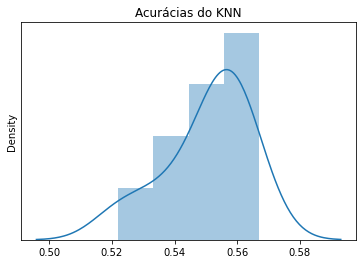

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


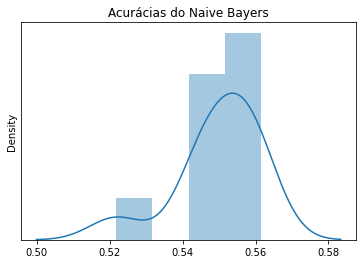

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(scoresKNN)
plt.yticks([])
plt.title("Acurácias do KNN")
plt.show()

sns.distplot(scoresNB)
plt.yticks([])
plt.title("Acurácias do Naive Bayers")
plt.show()